<h1>Where to invest in Toronto</h1>
<h3>Library imports</h3>

In [1]:
import requests, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geocoder
from geopy.geocoders import Nominatim
import folium
import json

pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None  # This will avoid some pandas warnings, for sake of clarity and neatness of the notebook

# Credentials of the APIs that will be used: 

# Foursquare API: 
CLIENT_ID = '4FWERNJYSXTCPHFBLZP24MPPCVJD4ANMNOX0RT1R4EXL4PIP' # your Foursquare ID
CLIENT_SECRET = 'KBOH311C5RQJU1KZXVFK4PM5JIFECYB525SPPGMYMYKKPD3E' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 300 # A default Foursquare API limit value

# WalkScore API:
ws_apikey = 'd9000b4f360a9dd1ada55554835cc472'

print("Libraries imported")


Libraries imported


<h3>List of Toronto neighborhoods</h3>
<p>We will get the list of Toronto neighborhoods from the Wikipedia page: <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" target="_blank">https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M</a></p>

In [2]:
# First, we will scrap the list of Toronto neighborhoods:
r = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
dfs = pd.read_html(r.text)
df_toronto = dfs[0]

# Clean the dataframe removing the rows with Boroughs 'Not assigned'
df_toronto_clean = df_toronto[df_toronto.Borough != 'Not assigned']

# Reindex the dataframe: 
df_toronto_clean.reset_index(drop=True, inplace=True)

# Let's stick to the American style to spell 'Neighborhood'
df_toronto_clean = df_toronto_clean.rename(columns={'Neighbourhood': 'Neighborhood'})

# What do we have for now...
df_toronto_clean


Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Vic

<p>After inspection, we will remove from the dataframe the rows corresponding to special Postal Codes:
<ul><li>M7R: Canada Post Gateway Processing Centre</li> 
    <li>M5W: Stn A PO Boxes</li>
    <li>M7Y: Business reply mail Processing Centre, South Central Letter Processing Plant Toronto</li></ul>

In [4]:
# Remove the rows corresponding to special Postal Codes

df_toronto_clean = df_toronto_clean[(df_toronto_clean['Postal Code'] != 'M7Y')&(df_toronto_clean['Postal Code'] != 'M5W')&(df_toronto_clean['Postal Code'] != 'M7R')]
df_toronto_clean

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Victoria Village  
2                            Regent Park, Harbourfront  
3                     Lawrence Manor, 

<p>The dataframe <em>df_toronto_clean</em> will be where we will store all the clean data we use throughout this notebook. Hence its "surname", Clean... </p>
<p>Now, we must link every Postal Code (i.e. neighborhood) to a geographical reference (latitude and longitude).</p>

In [5]:
# Find longitude and latitude values for every Postal Code of Toronto
# We will use the ARCGIS API

latitude=[]
longitude=[]
for code in df_toronto_clean['Postal Code']:
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(code))
# Let's visualize what we have found out:        
        print(code, g.latlng)
        
# Create two arrays, one for latitudes and another for longitudes 
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

M3A [43.75245000000007, -79.32990999999998]
M4A [43.73057000000006, -79.31305999999995]
M5A [43.65512000000007, -79.36263999999994]
M6A [43.72327000000007, -79.45041999999995]
M7A [43.66253000000006, -79.39187999999996]
M9A [43.662630000000036, -79.52830999999998]
M1B [43.811390000000074, -79.19661999999994]
M3B [43.74923000000007, -79.36185999999998]
M4B [43.70718000000005, -79.31191999999999]
M5B [43.65739000000008, -79.37803999999994]
M6B [43.70687000000004, -79.44811999999996]
M9B [43.65034000000003, -79.55361999999997]
M1C [43.78574000000003, -79.15874999999994]
M3C [43.72168000000005, -79.34351999999996]
M4C [43.68970000000007, -79.30681999999996]
M5C [43.65215000000006, -79.37586999999996]
M6C [43.69211000000007, -79.43035999999995]
M9C [43.64857000000006, -79.57824999999997]
M1E [43.765750000000025, -79.17469999999997]
M4E [43.67709000000008, -79.29546999999997]
M5E [43.64536000000004, -79.37305999999995]
M6E [43.68784000000005, -79.45045999999996]
M1G [43.76812000000007, -79.2

In [6]:
# Let's add both lists as new columns in our Toronto dataframe

df_toronto_clean['Latitude'] = latitude
df_toronto_clean['Longitude'] = longitude

# What do we have now?
df_toronto_clean.head()

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

   Latitude  Longitude  
0  43.75245  -79.32991  
1  43.73057  -79.31306  
2  43.65512  -79.36264  
3  43.72327  -79.45042  
4  43.66253  -79.39188

<h3>VENUES</h3>
<p> Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them according to the number of venues we can find on them.</p>


In [7]:
# Let's create a function to obtain the venues of all the neighborhoods in Toronto

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Code to run the above function on each neighborhood and create a new dataframe called toronto_venues:

toronto_venues = getNearbyVenues(names=df_toronto_clean['Neighborhood'],
                                   latitudes=df_toronto_clean['Latitude'],
                                   longitudes=df_toronto_clean['Longitude']
                                  )

In [8]:
# Let's check the size of the resulting dataframe
print(toronto_venues.shape)

# And what does the resultant dataframe looks like
toronto_venues.head()

(2105, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods               43.75245               -79.32991   
1         Parkwoods               43.75245               -79.32991   
2  Victoria Village               43.73057               -79.31306   
3  Victoria Village               43.73057               -79.31306   
4  Victoria Village               43.73057               -79.31306   

                Venue  Venue Latitude  Venue Longitude     Venue Category  
0     Brookbanks Park       43.751976       -79.332140               Park  
1       Variety Store       43.751974       -79.333114  Food & Drink Shop  
2        Wigmore Park       43.731023       -79.310771               Park  
3  Memories of Africa       43.726602       -79.312427      Grocery Store  
4       Guardian Drug       43.730584       -79.307432           Pharmacy

In [9]:
# how many venues were returned for each neighborhood

df_nr_venues = toronto_venues.groupby('Neighborhood').count()
df_nr_venues

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                              16   
Alderwood, Long Branch                                                  4   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      19   
Berczy Park                                                            60   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           84   
CN Tower, King and Spadina, Railway Lands, Harb...                     76   
Caledonia-Fairbanks                                                     7   
Cedarbrae                                                               1   
Central Bay Street                                                     76   
Christie                                                               11   
Church and Wellesley                                                   79   
Clarks Corners, Tam O'Shanter, Sullivan                                16   
Cliffside, Cliffcrest, Scarborough Village West                         8   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             26   
Davisville North                                                        8   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        4   
Don Mills                                                              15   
Dorset Park, Wexford Heights, Scarborough Town ...                      2   
Downsview                                                              41   
Dufferin, Dovercourt Village                                           17   
East Toronto, Broadview North (Old East York)                           3   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      6   
Fairview, Henry Farm, Oriole                                           55   
First Canadian Place, Underground city                                100   
Forest Hill North & West, Forest Hill Road Park                         2   
Garden District, Ryerson                                              100   
Glencairn                                                              13   
Golden Mile, Clairlea, Oakridge                                        10   
Guildwood, Morningside, West Hill                                       3   
Harbourfront East, Union Station, Toronto Islands                      58   
High Park, The Junction South                                           4   
Hillcrest Village                                                       2   
Humber Summit                                                           2   
Humberlea, Emery                                                        4   
Humewood-Cedarvale                                                      5   
India Bazaar, The Beaches West                                         18   
Islington Avenue, Humber Valley Village                                 8   
Kennedy Park, Ionview, East Birchmount Park                             3   
Kensington Market, Chinatown, Grange Park                              57   
Kingsview Village, St. Phillips, Martin Grove G...                      5   
Lawrence Manor, Lawrence Heights                                       51   
Lawrence Park                                                           2   
Leaside                                                                33   
Little Portugal, Trinity                                               45   
Malvern, Rouge                                                          3   
Milliken, Agincourt North, Steeles East, L'Amor...                      3   
Mimico NW, The Queensway West, South of Bloor, ...                     12   
Moore Park, Summerhill East                     

In [10]:
# Now let's insert the Venue column into df_toronto_clean dataframe

df_toronto_clean['Venue'] = 0
xmax = df_nr_venues.shape[0]
ymax = df_toronto_clean.shape[0]
for x in range(xmax):
    neig = df_nr_venues.index[x]
    venu = df_nr_venues.iloc[x,0]
    for y in range(ymax):
        if df_toronto_clean.iloc[y,2] == neig:
            df_toronto_clean.iloc[y,5] = venu
df_toronto_clean.head()

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

   Latitude  Longitude  Venue  
0  43.75245  -79.32991      2  
1  43.73057  -79.31306      3  
2  43.65512  -79.36264     20  
3  43.72327  -79.45042     51  
4  43.66253  -79.39188     18

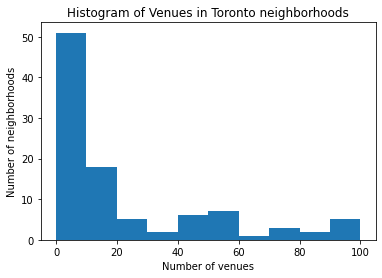

In [11]:
# Let's check how the histogram of the number of venues in the neighbourhoods look like, 
# to help us take some decision regarding our Venue Score
import matplotlib.pyplot as plt
plt.hist(df_toronto_clean['Venue'])
plt.title('Histogram of Venues in Toronto neighborhoods')
plt.ylabel('Number of neighborhoods')
plt.xlabel('Number of venues')
plt.show() 

In [12]:
# According to the shown distribution, we decide to calculate Venue Score as the multiple of 10 closest to Venue value. 
df_toronto_clean['Venue Score'] = round(df_toronto_clean['Venue'],-1)
df_toronto_clean.head()

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

   Latitude  Longitude  Venue  Venue Score  
0  43.75245  -79.32991      2            0  
1  43.73057  -79.31306      3            0  
2  43.65512  -79.36264     20           20  
3  43.72327  -79.45042     51           50  
4  43.66253  -79.39188     18           20

<p><strong>TOP-10 NEIGHBORHOODS IN NUMBER OF VENUES</strong></p>
<p>We will get this Top-10 list for every parameter we are measuring.</p>

In [24]:
# So this is the Top-10 neighborhoods on number of venues: 
df_top10_venues = df_toronto_clean.nlargest(10,'Venue')
df_top10_venues[['Neighborhood','Venue Score']]

Neighborhood  Venue Score
9                            Garden District, Ryerson          100
30                           Richmond, Adelaide, King          100
42           Toronto Dominion Centre, Design Exchange          100
48                     Commerce Court, Victoria Hotel          100
97             First Canadian Place, Underground city          100
43       Brockton, Parkdale Village, Exhibition Place           80
15                                     St. James Town           80
99                               Church and Wellesley           80
24                                 Central Bay Street           80
87  CN Tower, King and Spadina, Railway Lands, Har...           80

<p><strong>MAP VISUALIZATION FOR VENUE SCORE</strong></p>

In [25]:
# Now, let's visualize the results of Venue Score on a Toronto Map

# Read GeoJSON file
with open('toronto_m2.geojson') as data:
    t_geo= json.load(data)

# Create a plain map
result_map = folium.Map(location=[43.7000000, -79.3839347], tiles='openstreetmap', zoom_start=11)

# Add choropleth to the map
choropleth = folium.Choropleth(
    geo_data = t_geo, 
    data= df_toronto_clean,
    columns=['Postal Code','Venue Score'],
    key_on='feature.properties.CFSAUID',
    fill_color='Reds',
    fill_opacity=0.5, 
    line_opacity=0.3,
    legend_name='Venue Score of Toronto neighborhoods',
    highlight=False).add_to(result_map)

# Add labels indicating the name of the neighborhood
style_function = "font-size:12px;"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NEIG'], style=style_function, labels=False))

# Display map
result_map

<H3>WALK, BIKE AND PUBLIC TRANSPORT SCORES</H3>
<p>Use of Walk Score API to obtain the rest of Scores for every Toronto neighborhood</p>

In [26]:
# Let's create a function which will obtain all the Scores (Walk, Bike and Public Transport) for every neighborhood
def getScores(latit,longi):
    scores_list = []
    #API request URL
    url = 'https://api.walkscore.com/score?format=json&lat={}&lon={}&transit=1&bike=1&wsapikey={}'.format(latit,longi,ws_apikey)
    # make the GET request
    resultados = requests.get(url).json()
    dftiempo = pd.DataFrame.from_dict(resultados)
    wscore = dftiempo.iloc[0,1]
    tscore = dftiempo.iloc[0,11]
    bscore = dftiempo.iloc[0,12]

    return(wscore, tscore, bscore)

In [27]:
# So let's retrieve the Scores and add them to our df_toronto_clean dataframe
df_toronto_clean['Walk Score'] = 0
df_toronto_clean['Transit Score'] = 0
df_toronto_clean['Bike Score'] = 0
xmax = df_toronto_clean.shape[0]
for x in range(xmax):
    la = df_toronto_clean.iloc[x,3]
    lo = df_toronto_clean.iloc[x,4]
    toronto_temporal = getScores(latit=la, longi=lo)
    df_toronto_clean.iloc[x,7] = toronto_temporal[0]
    df_toronto_clean.iloc[x,8] = toronto_temporal[1]
    df_toronto_clean.iloc[x,9] = toronto_temporal[2]
df_toronto_clean.head()

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

   Latitude  Longitude  Venue  Venue Score  Walk Score  Transit Score  \
0  43.75245  -79.32991      2            0          16             51   
1  43.73057  -79.31306      3            0          45             65   
2  43.65512  -79.36264     20           20          90             94   
3  43.72327  -79.45042     51           50          63             89   
4  43.66253  -79.39188     18           20          90             99   

   Bike Score  
0          39  
1          57  
2          99  
3          57  
4          98

<strong>TOP-10 NEIGHBORHOODS FOR WALKING</strong>

In [30]:
df_top10_walk = df_toronto_clean.nlargest(10,'Walk Score')
df_top10_walk[['Neighborhood','Walk Score']]

Neighborhood  Walk Score
24                         Central Bay Street          99
84  Kensington Market, Chinatown, Grange Park          99
9                    Garden District, Ryerson          98
15                             St. James Town          98
30                   Richmond, Adelaide, King          98
48             Commerce Court, Victoria Hotel          98
97     First Canadian Place, Underground city          98
99                       Church and Wellesley          98
42   Toronto Dominion Centre, Design Exchange          97
74        The Annex, North Midtown, Yorkville          92

<strong>MAP VISUALIZATION FOR WALK SCORE</strong>

In [31]:
# Now, let's visualize the results of Toronto Walk Scores

# Read GeoJSON file
with open('toronto_m2.geojson') as data:
    t_geo= json.load(data)

# Create a plain map
result_map = folium.Map(location=[43.7000000, -79.3839347], tiles='openstreetmap', zoom_start=11)

# Add choropleth to the map
choropleth = folium.Choropleth(
    geo_data = t_geo, 
    data= df_toronto_clean,
    columns=['Postal Code','Walk Score'],
    key_on='feature.properties.CFSAUID',
    fill_color='Blues',
    fill_opacity=0.5, 
    line_opacity=0.3,
    legend_name='Walk Score of Toronto neighborhoods',
    highlight=False).add_to(result_map)

# Add labels indicating the name of the neighborhood
style_function = "font-size:12px;"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NEIG'], style=style_function, labels=False))

# Display map
result_map

<strong>TOP-10 NEIGHBORHOODS FOR BIKES</strong>

In [34]:
df_top10_bike = df_toronto_clean.nlargest(10,'Bike Score')
df_top10_bike[['Neighborhood','Bike Score']]

Neighborhood  Bike Score
80               University of Toronto, Harbord         100
84    Kensington Market, Chinatown, Grange Park         100
2                     Regent Park, Harbourfront          99
54                              Studio District          99
4   Queen's Park, Ontario Provincial Government          98
99                         Church and Wellesley          98
47               India Bazaar, The Beaches West          97
74          The Annex, North Midtown, Yorkville          97
96                  St. James Town, Cabbagetown          97
9                      Garden District, Ryerson          96

<strong>MAP VISUALIZATION FOR BIKE SCORE</strong>

In [33]:
# Visualization the results of Toronto Bike Scores

# Read GeoJSON file
with open('toronto_m2.geojson') as data:
    t_geo= json.load(data)

# Create a plain map
result_map = folium.Map(location=[43.7000000, -79.3839347], tiles='openstreetmap', zoom_start=11)

# Add choropleth to the map
choropleth = folium.Choropleth(
    geo_data = t_geo, 
    data= df_toronto_clean,
    columns=['Postal Code','Bike Score'],
    key_on='feature.properties.CFSAUID',
    fill_color='Greens',
    fill_opacity=0.5, 
    line_opacity=0.3,
    legend_name='Bike Score of Toronto neighborhoods',
    highlight=False).add_to(result_map)

# Add labels indicating the name of the neighborhood
style_function = "font-size:12px;"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NEIG'], style=style_function, labels=False))

# Display map
result_map

<strong>TOP-11 NEIGHBORHOODS IN PUBLIC TRANSPORT</strong>
<p>Why 11? Because there are 11 neighborhoods with the maximum Transit Score (100 points).</p>

In [38]:
df_top11_transit = df_toronto_clean.nlargest(11,'Transit Score')
df_top11_transit[['Neighborhood','Transit Score']]

Neighborhood  Transit Score
9                            Garden District, Ryerson            100
15                                     St. James Town            100
20                                        Berczy Park            100
24                                 Central Bay Street            100
30                           Richmond, Adelaide, King            100
36  Harbourfront East, Union Station, Toronto Islands            100
42           Toronto Dominion Centre, Design Exchange            100
48                     Commerce Court, Victoria Hotel            100
80                     University of Toronto, Harbord            100
84          Kensington Market, Chinatown, Grange Park            100
97             First Canadian Place, Underground city            100

<strong>MAP VISUALIZATION FOR PUBLIC TRANSPORT</strong>

In [39]:
# Visualization the results of Toronto Transit Scores

# Read GeoJSON file
with open('toronto_m2.geojson') as data:
    t_geo= json.load(data)

# Create a plain map
result_map = folium.Map(location=[43.7000000, -79.3839347], tiles='openstreetmap', zoom_start=11)

# Add choropleth to the map
choropleth = folium.Choropleth(
    geo_data = t_geo, 
    data= df_toronto_clean,
    columns=['Postal Code','Transit Score'],
    key_on='feature.properties.CFSAUID',
    fill_color='Purples',
    fill_opacity=0.5, 
    line_opacity=0.3,
    legend_name='Transit Score of Toronto neighborhoods',
    highlight=False).add_to(result_map)

# Add labels indicating the name of the neighborhood
style_function = "font-size:12px;"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NEIG'], style=style_function, labels=False))

# Display map
result_map

<h3>GLOBAL SCORE</h3>
<p>Now that we have found and visualized the scores of each of the four aspects considered, we will calculate a Global Score which will gather all of them.</p>
<p>For the sake of simplicity, we will calculate the arithmetic mean of the four scores to get the Global Score. If required, we could easily weigh the influence of each score by adding a weighting factor to the arithmetic mean formula.</p> 

In [40]:
df_toronto_clean['Global Score'] = (df_toronto_clean['Venue Score'] + df_toronto_clean['Walk Score'] + df_toronto_clean['Transit Score'] + df_toronto_clean['Bike Score']) // 4
df_toronto_clean.head()

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

   Latitude  Longitude  Venue  Venue Score  Walk Score  Transit Score  \
0  43.75245  -79.32991      2            0          16             51   
1  43.73057  -79.31306      3            0          45             65   
2  43.65512  -79.36264     20           20          90             94   
3  43.72327  -79.45042     51           50          63             89   
4  43.66253  -79.39188     18           20          90             99   

   Bike Score  Global Score  
0          39            26  
1          57            41  
2          99            75  
3          57            64  
4          98            76

<strong>TOP-10 NEIGHBORHOODS ACCORDING TO GLOBAL SCORE</strong>

In [42]:
df_top10_global = df_toronto_clean.nlargest(10,'Global Score')
df_top10_global[['Neighborhood','Global Score']]

Neighborhood  Global Score
9                            Garden District, Ryerson            98
30                           Richmond, Adelaide, King            97
48                     Commerce Court, Victoria Hotel            97
42           Toronto Dominion Centre, Design Exchange            96
97             First Canadian Place, Underground city            96
15                                     St. James Town            93
99                               Church and Wellesley            91
84          Kensington Market, Chinatown, Grange Park            89
24                                 Central Bay Street            88
87  CN Tower, King and Spadina, Railway Lands, Har...            88

<strong>GLOBAL MAP VISUALIZATION</strong>

In [44]:
# Visualization the results of Toronto Global Scores

# Read GeoJSON file
with open('toronto_m2.geojson') as data:
    t_geo= json.load(data)

# Create a plain map
result_map = folium.Map(location=[43.7000000, -79.3839347], tiles='openstreetmap', zoom_start=11)

# Add choropleth to the map
choropleth = folium.Choropleth(
    geo_data = t_geo, 
    data= df_toronto_clean,
    columns=['Postal Code','Global Score'],
    key_on='feature.properties.CFSAUID',
    fill_color='YlOrRd',
    fill_opacity=0.5, 
    line_opacity=0.3,
    legend_name='Investing Potential Score',
    highlight=False).add_to(result_map)

# Add labels indicating the name of the neighborhood
style_function = "font-size:12px;"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NEIG'], style=style_function, labels=False))

# Display map
result_map

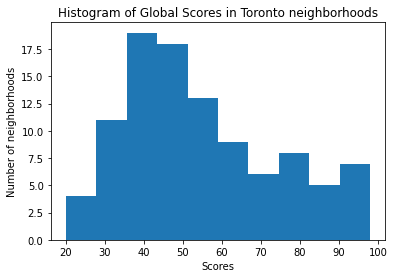

In [51]:
# Let's check how the histogram of Global Score in the neighbourhoods looks like

plt.hist(df_toronto_clean['Global Score'])
plt.title('Histogram of Global Scores in Toronto neighborhoods')
plt.ylabel('Number of neighborhoods')
plt.xlabel('Scores')
plt.show() 